# WEEK3 Assess Fit

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

In [1]:
import graphlab

In [2]:
tmp = graphlab.SArray([1.,2.,3.])
tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

[INFO] 1451978956 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /usr/local/lib/python2.7/dist-packages/certifi/cacert.pem
1451978956 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to 527536646@qq.com and will expire on October 23, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-1248 - Server binary: /usr/local/lib/python2.7/dist-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1451978956.log
[INFO] GraphLab Server Version: 1.7.1


[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


In [3]:
ex_sframe = graphlab.SFrame()
ex_sframe['power_1'] = tmp
print ex_sframe


+---------+
| power_1 |
+---------+
|   1.0   |
|   2.0   |
|   3.0   |
+---------+
[3 rows x 1 columns]



# Polynomial_sframe function

In [16]:
def polynomial_sframe(feature, degree):
    # assume that degree >=1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    poly_sframe['power_1'] = feature
    
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            # assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
            
            
    return poly_sframe
            

In [17]:
print polynomial_sframe(tmp, 3)

+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



# Visualizing polynomial regression

In [6]:
sales = graphlab.SFrame('kc_house_data.gl/')

In [7]:
sales = sales.sort('sqft_living')

In [8]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target

In [9]:
model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 1.004839     | 4362074.696077     | 261440.790724 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [10]:
model1.get("coefficients")

name,index,value
(intercept),None,-43579.0852515
power_1,None,280.622770886


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

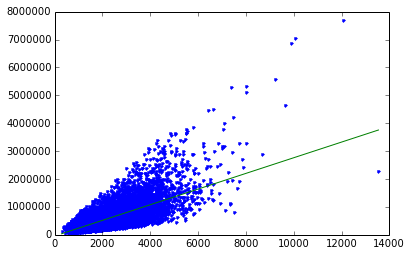

In [12]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

In [18]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 2
PROGRESS: Number of unpacked features : 2
PROGRESS: Number of coefficients    : 3
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.004702     | 5913020.984255     | 250948.368758 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [19]:
model2.get("coefficients")

name,index,value
(intercept),None,199222.496445
power_1,None,67.9940640677
power_2,None,0.0385812312789


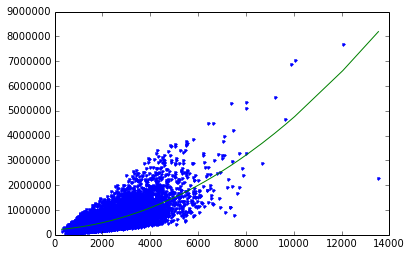

In [20]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'-')

In [21]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
my_features = poly3_data.column_names() # get the name of the features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
model3 = graphlab.linear_regression.create(poly3_data, target = 'price', features = my_features, validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 3
PROGRESS: Number of unpacked features : 3
PROGRESS: Number of coefficients    : 4
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.005397     | 3261066.736007     | 249261.286346 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [22]:
model3.get("coefficients")

name,index,value
(intercept),None,336788.117952
power_1,None,-90.1476236119
power_2,None,0.087036715081
power_3,None,-3.8398521196e-06


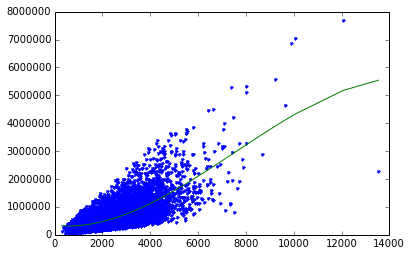

In [23]:
plt.plot(poly3_data['power_1'],poly3_data['price'],'.',
        poly3_data['power_1'], model3.predict(poly3_data),'-')

In [24]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 21613
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.019231     | 2662308.584338     | 245690.511190 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [25]:
model15.get("coefficients")

name,index,value
(intercept),None,73619.7521152
power_1,None,410.287462532
power_2,None,-0.230450714429
power_3,None,7.58840542472e-05
power_4,None,-5.65701802728e-09
power_5,None,-4.57028130557e-13
power_6,None,2.66360206673e-17
power_7,None,3.38584768925e-21
power_8,None,1.14723104144e-25
power_9,None,-4.65293584835e-30


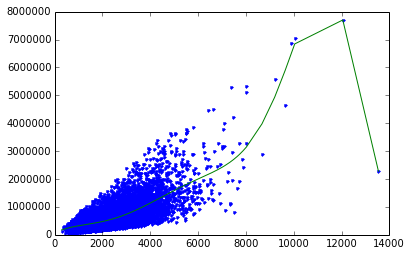

In [26]:
plt.plot(poly15_data['power_1'],poly15_data['price'],'.',
        poly15_data['power_1'], model15.predict(poly15_data),'-')

## Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Do this as follows:
* First split sales into 2 subsets using .random_split(0.5) set seed = 0! 
* Next split the resulting subsets into 2 more subsets each. Use .random_split(.5) and seed = 0!
You should end with 4 subsets (set_1, set_2, set_3, set_4) of approximately equal size. 

In [28]:
set1,set2 =sales.random_split(.5,seed = 0)
set_1,set_2 = set1.random_split(.5,seed = 0)
set_3,set_4 = set2.random_split(.5,seed = 0)


In [29]:
poly15_1_data = polynomial_sframe(set_1['sqft_living'], 15)
my_features = poly15_1_data.column_names() # get the name of the features
poly15_1_data['price'] = set_1['price'] # add price to the data since it's the target
model15_1 = graphlab.linear_regression.create(poly15_1_data, target = 'price', features = my_features, validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5404
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.005361     | 2228329.099171     | 248152.913943 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [30]:
model15_1.get("coefficients")

name,index,value
(intercept),None,197099.450457
power_1,None,166.862882904
power_2,None,-0.0697578810017
power_3,None,3.63129717599e-05
power_4,None,-3.74901359197e-09
power_5,None,-8.76717441313e-14
power_6,None,1.41557620277e-17
power_7,None,1.12198026363e-21
power_8,None,2.77358582242e-26
power_9,None,-1.94539657104e-30


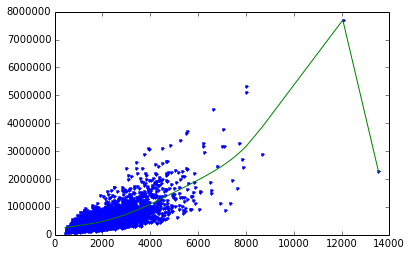

In [31]:
plt.plot(poly15_1_data['power_1'],poly15_1_data['price'],'.',
        poly15_1_data['power_1'], model15_1.predict(poly15_1_data),'-')

In [32]:
poly15_2_data = polynomial_sframe(set_2['sqft_living'], 15)
my_features = poly15_2_data.column_names() # get the name of the features
poly15_2_data['price'] = set_2['price'] # add price to the data since it's the target
model15_2 = graphlab.linear_regression.create(poly15_2_data, target = 'price', features = my_features, validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5398
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.004734     | 2088785.305270     | 241096.375401 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [33]:
model15_2.get("coefficients")

name,index,value
(intercept),None,160515.194672
power_1,None,161.068906205
power_2,None,0.0072128855478
power_3,None,-1.5376745134e-05
power_4,None,5.53101276893e-09
power_5,None,3.4491414194e-13
power_6,None,-8.41349331281e-17
power_7,None,-1.17557544116e-20
power_8,None,-3.24855695882e-25
power_9,None,8.06950508946e-29


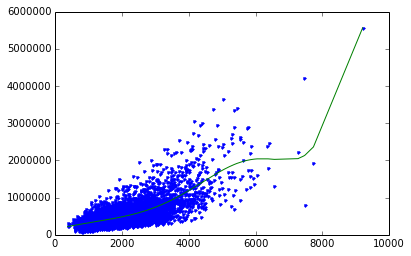

In [35]:
plt.plot(poly15_2_data['power_1'],poly15_2_data['price'],'.',
        poly15_2_data['power_1'], model15_2.predict(poly15_2_data),'-')

In [36]:
poly15_3_data = polynomial_sframe(set_3['sqft_living'], 15)
my_features = poly15_3_data.column_names() # get the name of the features
poly15_3_data['price'] = set_3['price'] # add price to the data since it's the target
model15_3 = graphlab.linear_regression.create(poly15_3_data, target = 'price', features = my_features, validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5409
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.005115     | 2299051.014329     | 247777.375090 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [37]:
model15_3.get("coefficients")

name,index,value
(intercept),None,64031.5743649
power_1,None,419.963446524
power_2,None,-0.217032383677
power_3,None,5.71721871022e-05
power_4,None,6.42456679336e-10
power_5,None,-8.7676433612e-13
power_6,None,-4.39079424839e-17
power_7,None,4.65780734744e-21
power_8,None,8.56537635977e-25
power_9,None,5.87177076574e-29


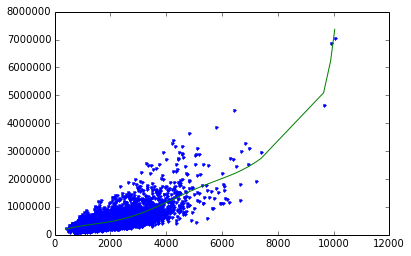

In [38]:
plt.plot(poly15_3_data['power_1'],poly15_3_data['price'],'.',
        poly15_3_data['power_1'], model15_3.predict(poly15_3_data),'-')

In [39]:
poly15_4_data = polynomial_sframe(set_4['sqft_living'], 15)
my_features = poly15_4_data.column_names() # get the name of the features
poly15_4_data['price'] = set_4['price'] # add price to the data since it's the target
model15_4 = graphlab.linear_regression.create(poly15_4_data, target = 'price', features = my_features, validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5402
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.004854     | 2269628.732675     | 242204.386550 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [40]:
model15_4.get("coefficients")

name,index,value
(intercept),None,238215.539483
power_1,None,35.6890462186
power_2,None,0.0384180337733
power_3,None,1.00407290081e-05
power_4,None,-5.35136998577e-09
power_5,None,3.3566213551e-13
power_6,None,1.81755721603e-16
power_7,None,6.62015234883e-21
power_8,None,-3.13250645255e-24
power_9,None,-6.11495895427e-28


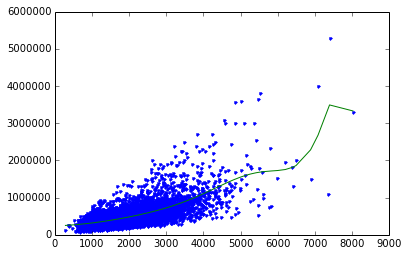

In [41]:
plt.plot(poly15_4_data['power_1'],poly15_4_data['price'],'.',
        poly15_4_data['power_1'], model15_4.predict(poly15_4_data),'-')

## Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one very well-known way to select these parameters: cross validation. 

Now you're going to split the sales data again this time into 3 subsets as follows:

* Split our sales data into 2 sets: training_and_validation and testing. Use .random_split(0.9) and seed = 1!
* Next split training_and_validation into trainign and validation with .random_split(0.5) and seed = 1!

Be *very* careful that you use seed = 1 to ensure you get the same answer!

In [90]:
training_and_validation, testing = sales.random_split(.9,seed = 1)
training, validation = training_and_validation.random_split(.5,seed = 1)

In [106]:
poly_data ={}
vali_data = {}
test_data = {}
my_features ={}
model = {}
for degree in range(1, 15+1):
    poly_data[degree] = polynomial_sframe(training['sqft_living'], degree)
    vali_data[degree] = polynomial_sframe(validation['sqft_living'], degree)
    test_data[degree] = polynomial_sframe(testing['sqft_living'], degree)
    my_features[degree] = poly_data[degree].column_names()
    poly_data[degree]['price'] = training['price']
    vali_data[degree]['price'] = validation['price']
    test_data[degree]['price'] = testing['price']
    model[degree] = graphlab.linear_regression.create(poly_data[degree], target = 'price', features = my_features[degree], validation_set = None)
    


PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.001901     | 4300026.527428     | 258622.483071 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:
PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 9761
PROGRE

In [92]:
for degree in range(1, 15+1):
    print model[degree].get("coefficients")

+-------------+-------+----------------+
|     name    | index |     value      |
+-------------+-------+----------------+
| (intercept) |  None | -40090.2310384 |
|   power_1   |  None | 279.139811117  |
+-------------+-------+----------------+
[2 rows x 3 columns]

+-------------+-------+-----------------+
|     name    | index |      value      |
+-------------+-------+-----------------+
| (intercept) |  None |  150517.677657  |
|   power_1   |  None |  114.339135604  |
|   power_2   |  None | 0.0293159406346 |
+-------------+-------+-----------------+
[3 rows x 3 columns]

+-------------+-------+--------------------+
|     name    | index |       value        |
+-------------+-------+--------------------+
| (intercept) |  None |   378672.111347    |
|   power_1   |  None |   -143.95398966    |
|   power_2   |  None |   0.106520710099   |
|   power_3   |  None | -5.83600134395e-06 |
+-------------+-------+--------------------+
[4 rows x 3 columns]

+-------------+-------+-----------

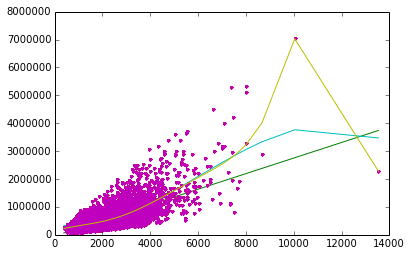

In [87]:

plt.plot(poly_data[1]['power_1'],poly_data[1]['price'],'.',
         poly_data[1]['power_1'], model[1].predict(poly_data[degree]),'-')
plt.plot(poly_data[3]['power_1'],poly_data[3]['price'],'.',
         poly_data[3]['power_1'], model[3].predict(poly_data[degree]),'-')
plt.plot(poly_data[15]['power_1'],poly_data[15]['price'],'.',
         poly_data[15]['power_1'], model[15].predict(poly_data[degree]),'-')
    

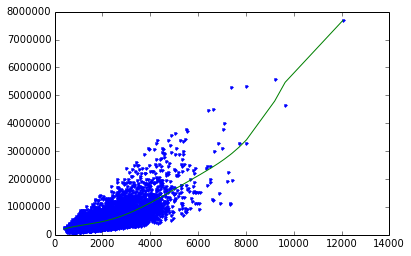

In [82]:
plt.plot(poly_data[10]['power_1'],poly_data[10]['price'],'.',
         poly_data[10]['power_1'], model[10].predict(poly_data[degree]),'-')

In [93]:
def get_residual_sum_of_square(model, data, outcome):
    # First get the predictions
    predictions = model.predict(data)
    # Then compute the residuals/errors
    residuals = predictions - outcome
    # Then square and add them up
    RSS = (residuals*residuals).sum()
    return(RSS) 

In [94]:
rss = get_residual_sum_of_square(model[3], validation, validation['price'])
print rss
rss = get_residual_sum_of_square(model[1], validation, validation['price'])
print rss

1.36473503767e+15
1.36473503767e+15


In [96]:
# Then compute the residuals/errors
residuals = predictions - validation['price']
    # Then square and add them up
RSS = (residuals*residuals).sum()
print RSS 

predictions = model[3].predict(training)
# Then compute the residuals/errors
residuals = predictions - training['price']
    # Then square and add them up
RSS = (residuals*residuals).sum()
print RSS 

1.36473503767e+15
1.29914260253e+15


In [104]:
import operator

rss = {}
for degree in range(1, 15+1):
    rss[degree] = get_residual_sum_of_square(model[degree], vali_data[degree], vali_data[degree]['price'])
print rss

sorted_x = sorted(rss.items(), key=operator.itemgetter(1))
print sorted_x

{1: 691195074763540.5, 2: 622930696570711.2, 3: 630027250648528.2, 4: 623430333366339.0, 5: 613283570807749.9, 6: 603331784575296.2, 7: 604978997066836.9, 8: 613515765597412.4, 9: 623194043493760.8, 10: 631328586192000.8, 11: 636152414430493.9, 12: 637184636892557.4, 13: 635078408480827.6, 14: 631012948220171.0, 15: 626167016622639.2}
[(6, 603331784575296.2), (7, 604978997066836.9), (5, 613283570807749.9), (8, 613515765597412.4), (2, 622930696570711.2), (9, 623194043493760.8), (4, 623430333366339.0), (15, 626167016622639.2), (3, 630027250648528.2), (14, 631012948220171.0), (10, 631328586192000.8), (13, 635078408480827.6), (11, 636152414430493.9), (12, 637184636892557.4), (1, 691195074763540.5)]


In [107]:

rss = get_residual_sum_of_square(model[6], test_data[degree], test_data[degree]['price'])
print rss

1.28190059156e+14
